In [ ]:
# 1. Data Collection (Web Scraping):

In [1]:
#Libraries Used
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

In [3]:
# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Set the Flipkart website URL
url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&sortOrder=MOST_HELPFUL&certifiedBuyer=false&aid=overall"""
driver = webdriver.Chrome()
driver.get(url)


while len(Names) < 320:

    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Scrape names
    temp_names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in temp_names:
        Names.append(name.text)

    # Scrape cities
    temp_cities = soup.find_all("p", {"class": "MztJPv"}) 
    for city in temp_cities:
        Cities.append(city.text)

    # Scrape dates
    temp_dates = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in temp_dates:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]

    # Scrape reviews
    temp_reviews = soup.find_all("div", {"class": "ZmyHeo"})
    for review in temp_reviews:
        Reviews.append(review.text)

    # Scrape ratings
    temp_ratings = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in temp_ratings:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break

In [24]:
import pandas as pd
# Check length of all lists
print(len(Names))
print(len(Cities))
print(len(Actual_Dates))
print(len(Reviews))
print(len(Ratings))
# Get the shortest list length
min_len = min(len(Names), len(Cities), len(Actual_Dates), len(Reviews), len(Ratings))


230
230
230
230
230


In [25]:
import pandas as pd
# Slice all lists to the same length
df = pd.DataFrame({
  "Username": Names[:min_len],
    "City": Cities[:min_len],
    "Dates": Actual_Dates[:min_len],
    "Reviews": Reviews[:min_len],
    "Rating": Ratings[:min_len]
})

df

,Username,City,Dates,Reviews,Rating
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",Awesome 🔥🔥☺️READ MORE,5
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
225,anujyadav anuj,"Certified Buyer, Meerut","Sep, 2023",Very good productREAD MORE,5
226,Ashwani Mishra,"Certified Buyer, Sarnath","Jun, 2024",The iPhone 15 features a 48-megapixel main cam...,5
227,Krupansh Patel,"Certified Buyer, Valsad District","Oct, 2023",Overall Beast Performance 🔥10/10 Just Go For I...,5
228,Dev Sarda,"Certified Buyer, Malda","Oct, 2023",The best one from apple💙READ MORE,5


In [ ]:
# 2. Data Cleaning and Preprocessing:

In [6]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  230 non-null    object
 1   City      230 non-null    object
 2   Dates     230 non-null    object
 3   Reviews   230 non-null    object
 4   Rating    230 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


In [7]:
# Drop the duplicates from the dataframe
df = df.copy()
df = df.drop_duplicates()
df

,Username,City,Dates,Reviews,Rating
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",Awesome 🔥🔥☺️READ MORE,5
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
225,anujyadav anuj,"Certified Buyer, Meerut","Sep, 2023",Very good productREAD MORE,5
226,Ashwani Mishra,"Certified Buyer, Sarnath","Jun, 2024",The iPhone 15 features a 48-megapixel main cam...,5
227,Krupansh Patel,"Certified Buyer, Valsad District","Oct, 2023",Overall Beast Performance 🔥10/10 Just Go For I...,5
228,Dev Sarda,"Certified Buyer, Malda","Oct, 2023",The best one from apple💙READ MORE,5


In [26]:
# Convert the Name column data into Title Case
df['UserName_Title'] = df['Username'].str.title()
df.head()

,Username,City,Dates,Reviews,Rating,UserName_Title
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5,Bijaya Mohanty
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",Awesome 🔥🔥☺️READ MORE,5,Rishabh Jha
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5,Ajin V
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4,Mousam Guha Roy
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5,Prithivi Boruah


In [27]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase
df['Reviews'] = df['Reviews'].str.lower().str.replace("read more", "", regex=False)
df.head()

,Username,City,Dates,Reviews,Rating,UserName_Title
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",awesome 🔥🔥☺️,5,Rishabh Jha
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",high quality camera😍,5,Ajin V
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",very nice,4,Mousam Guha Roy
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",camera quality is improved loving it,5,Prithivi Boruah


In [ ]:
# 3. Sentiment Analysis:

In [28]:
# Import libraries for Sentimental analysis of review sentences 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to C:\Users\Amar
[nltk_data]     Pratap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Amar
[nltk_data]     Pratap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Amar
[nltk_data]     Pratap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Amar
[nltk_data]     Pratap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df["Reviews_t"] = df['Reviews'].apply(sent_tokenize)
df

,Username,City,Dates,Reviews,Rating,UserName_Title,Reviews_t
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty,[just go for it.amazing one.beautiful camera w...
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",awesome 🔥🔥☺️,5,Rishabh Jha,[awesome 🔥🔥☺️]
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",high quality camera😍,5,Ajin V,[high quality camera😍]
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",very nice,4,Mousam Guha Roy,[very nice]
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",camera quality is improved loving it,5,Prithivi Boruah,[camera quality is improved loving it]
...,...,...,...,...,...,...,...
225,anujyadav anuj,"Certified Buyer, Meerut","Sep, 2023",very good product,5,Anujyadav Anuj,[very good product]
226,Ashwani Mishra,"Certified Buyer, Sarnath","Jun, 2024",the iphone 15 features a 48-megapixel main cam...,5,Ashwani Mishra,[the iphone 15 features a 48-megapixel main ca...
227,Krupansh Patel,"Certified Buyer, Valsad District","Oct, 2023",overall beast performance 🔥10/10 just go for i...,5,Krupansh Patel,[overall beast performance 🔥10/10 just go for ...
228,Dev Sarda,"Certified Buyer, Malda","Oct, 2023",the best one from apple💙,5,Dev Sarda,[the best one from apple💙]


In [30]:
# Import mean from statistics for basic statistics
from statistics import mean

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
df['Polarity'] = df['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls calculate_average_polarity function on the Polarity column to assign the average polarity for each review
df['Average_Polarity'] = df['Polarity'].apply(calculate_average_polarity)
df['Average_Polarity'] = df['Average_Polarity'].round(2)
df.head(10)

,Username,City,Dates,Reviews,Rating,UserName_Title,Reviews_t,Polarity,Average_Polarity
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",awesome 🔥🔥☺️,5,Rishabh Jha,[awesome 🔥🔥☺️],[1.0],1.00
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",high quality camera😍,5,Ajin V,[high quality camera😍],[0.16],0.16
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",very nice,4,Mousam Guha Roy,[very nice],[0.78],0.78
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",camera quality is improved loving it,5,Prithivi Boruah,[camera quality is improved loving it],[0.6],0.60
5,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,Nikhil Kumar,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
6,Flipkart Customer,"Certified Buyer, Aizawl","Jan, 2024",awesome photography experience. battery backup...,5,Flipkart Customer,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
7,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,Akshay Meena,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
8,Arunji Govindaraju,"Certified Buyer, Chennai","Feb, 2024",awesome product very happy to hold this. bette...,5,Arunji Govindaraju,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65
9,Sheetla Prasad Maurya,"Certified Buyer, Sultanpur","Oct, 2023",best mobile phonecamera quality is very nice b...,4,Sheetla Prasad Maurya,[best mobile phonecamera quality is very nice ...,[0.738],0.74


In [31]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
df['Sentiment_Class'] = df['Average_Polarity'].apply(sentiment_class)
df.head()

,Username,City,Dates,Reviews,Rating,UserName_Title,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
1,Rishabh Jha,"Certified Buyer, Tikamgarh","Apr, 2024",awesome 🔥🔥☺️,5,Rishabh Jha,[awesome 🔥🔥☺️],[1.0],1.00,extremely positive
2,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",high quality camera😍,5,Ajin V,[high quality camera😍],[0.16],0.16,positive
3,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",very nice,4,Mousam Guha Roy,[very nice],[0.78],0.78,extremely positive
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",camera quality is improved loving it,5,Prithivi Boruah,[camera quality is improved loving it],[0.6],0.60,positive


In [32]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
        print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.46
The Average Polarity Score is Positive


In [ ]:
# 4. Data Analysis and Insights:

In [33]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

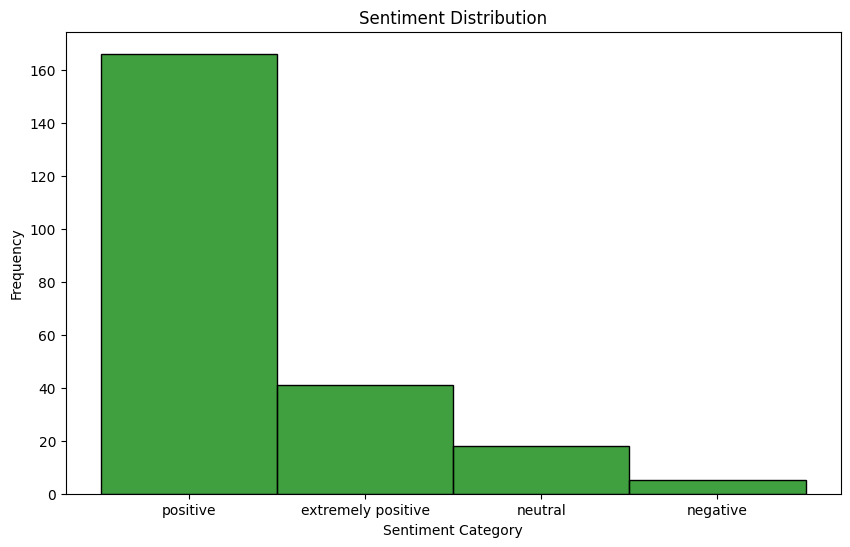

In [38]:
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6,))
sns.histplot(x=df.Sentiment_Class, color='Green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [35]:

# Calculate the length of the sentences by calculating the number of words in the review sentence
df['Review_Length'] = df['Reviews'].apply(lambda x: len(x.split()))

['positive' 'extremely positive' 'neutral' 'negative']


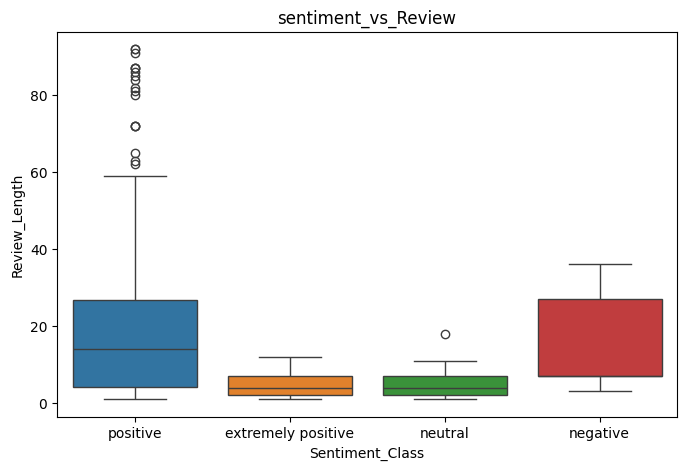

In [36]:
# Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df, hue = 'Sentiment_Class', palette=print(df['Sentiment_Class'].unique()))
plt.xlabel("Sentiment_Class")
plt.ylabel("Review_Length")
plt.title("sentiment_vs_Review")
plt.show()